In [1]:
import h5py

def print_structure(file: h5py.File, indent: str = ''):
    """
    Recursively print the structure of an HDF5 file/group.
    """
    items = sorted(file.items())
    for name, item in items:
        if isinstance(item, h5py.Dataset):
            print(f"{indent}- Dataset: {name} (Shape: {item.shape}, Dtype: {item.dtype})")
        elif isinstance(item, h5py.Group):
            print(f"{indent}- Group: {name}")
            print_structure(item, indent + '  ')

filename = "/Users/wanne/hdf5/bands/20231013-134352.hdf5"
with h5py.File(filename, 'r') as f:
    print_structure(f)


- Group: eeg
  - Group: bands
    - Group: _i_table
      - Group: index
        - Dataset: abounds (Shape: (0,), Dtype: int64)
        - Dataset: bounds (Shape: (0, 127), Dtype: int64)
        - Dataset: indices (Shape: (0, 131072), Dtype: uint32)
        - Dataset: indicesLR (Shape: (131072,), Dtype: uint32)
        - Dataset: mbounds (Shape: (0,), Dtype: int64)
        - Dataset: mranges (Shape: (0,), Dtype: int64)
        - Dataset: ranges (Shape: (0, 2), Dtype: int64)
        - Dataset: sorted (Shape: (0, 131072), Dtype: int64)
        - Dataset: sortedLR (Shape: (131201,), Dtype: int64)
        - Dataset: zbounds (Shape: (0,), Dtype: int64)
    - Dataset: table (Shape: (27,), Dtype: [('index', '<i8'), ('values_block_0', '<f8', (130,))])


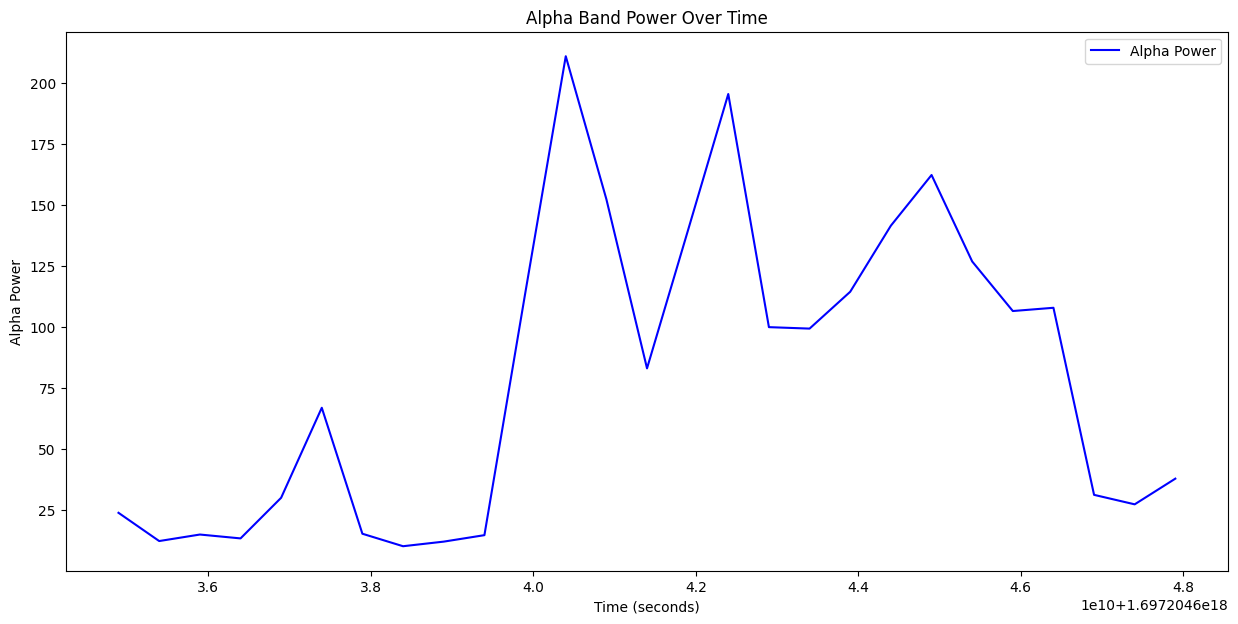

In [10]:
# Define a function to convert a structured numpy array to a DataFrame
def extract_to_dataframe(dataset):
    df_index = pd.DataFrame(dataset['index'], columns=['index'])
    # Reshape the 'values_block_0' dataset to match the shape of 'index'
    values = dataset['values_block_0'].reshape(-1, 1)
    df_alpha = pd.DataFrame(values, columns=['Alpha Power'])
    return pd.concat([df_index, df_alpha], axis=1)

# Specify the path to your HDF5 file
filename = "/Users/Sophia/hdf5/bands/20231013-134352.hdf5"

with h5py.File(filename, 'r') as f:
    # Extract the 'bands' dataset for alpha band
    alpha_band_dataset = f['eeg/bands/table'][:]
    
    # Convert it to a DataFrame
    alpha_band_df = extract_to_dataframe(alpha_band_dataset)

# Plot the alpha band data
plt.figure(figsize=(15, 7))
plt.plot(alpha_band_df['index'], alpha_band_df['Alpha Power'], label='Alpha Power', color='blue')
plt.xlabel('Time (seconds)')
plt.ylabel('Alpha Power')
plt.title('Alpha Band Power Over Time')
plt.legend()
plt.show()

# X-axis: This represents time, specifically the start time of each time window created by the Window node in your Timeflux pipeline. The values on the x-axis are time points.

# Y-axis: This represents the power spectral density (PSD) values, which are the average power values in specific frequency bands

In [11]:
import h5py

def print_structure(file: h5py.File, indent: str = ''):
    """
    Recursively print the structure of an HDF5 file/group.
    """
    items = sorted(file.items())
    for name, item in items:
        if isinstance(item, h5py.Dataset):
            print(f"{indent}- Dataset: {name} (Shape: {item.shape}, Dtype: {item.dtype})")
        elif isinstance(item, h5py.Group):
            print(f"{indent}- Group: {name}")
            print_structure(item, indent + '  ')

filename = "/Users/Sophia/hdf5/raw/20231013-134352.hdf5"
with h5py.File(filename, 'r') as f:
    print_structure(f)


- Group: eeg
  - Group: raw
    - Group: _i_table
      - Group: index
        - Dataset: abounds (Shape: (0,), Dtype: int64)
        - Dataset: bounds (Shape: (0, 127), Dtype: int64)
        - Dataset: indices (Shape: (0, 131072), Dtype: uint32)
        - Dataset: indicesLR (Shape: (131072,), Dtype: uint32)
        - Dataset: mbounds (Shape: (0,), Dtype: int64)
        - Dataset: mranges (Shape: (0,), Dtype: int64)
        - Dataset: ranges (Shape: (0, 2), Dtype: int64)
        - Dataset: sorted (Shape: (0, 131072), Dtype: int64)
        - Dataset: sortedLR (Shape: (131201,), Dtype: int64)
        - Dataset: zbounds (Shape: (0,), Dtype: int64)
    - Dataset: table (Shape: (16065,), Dtype: [('index', '<i8'), ('values_block_0', '<f8', (130,))])


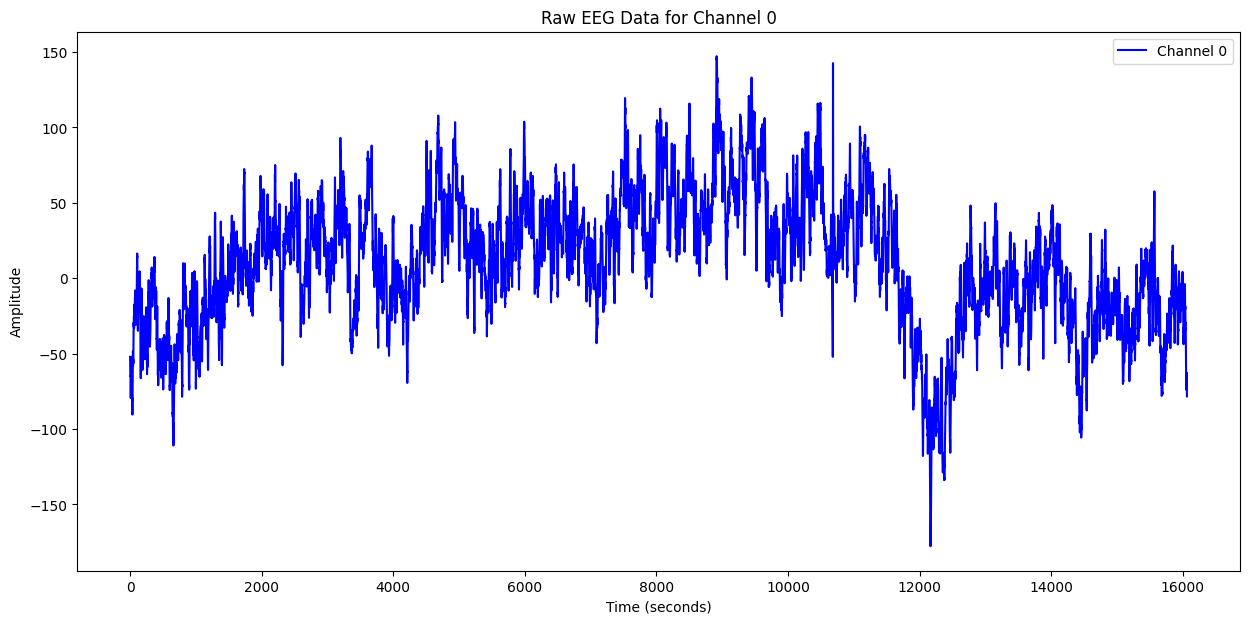

In [12]:
import h5py
import pandas as pd
import matplotlib.pyplot as plt

# Specify the path to your HDF5 file with raw EEG data
filename = "/Users/Sophia/hdf5/raw/20231013-134352.hdf5"

with h5py.File(filename, 'r') as f:
    # Extract the EEG raw data
    raw_data = f['eeg/raw/table'][:]
    
    # Convert it to a DataFrame
    raw_df = pd.DataFrame(raw_data['values_block_0'], columns=['Channel {}'.format(i) for i in range(raw_data['values_block_0'].shape[1])])

# Plot the raw EEG data
plt.figure(figsize=(15, 7))
plt.plot(raw_df.index, raw_df['Channel 0'], label='Channel 0', color='blue')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Raw EEG Data for Channel 0')
plt.legend()
plt.show()


In [ ]:
# the x-axis in the alpha band plot represents time within a specific epoch or window, 
# while the x-axis in the raw EEG data plot represents the continuous time scale of the entire recording session.

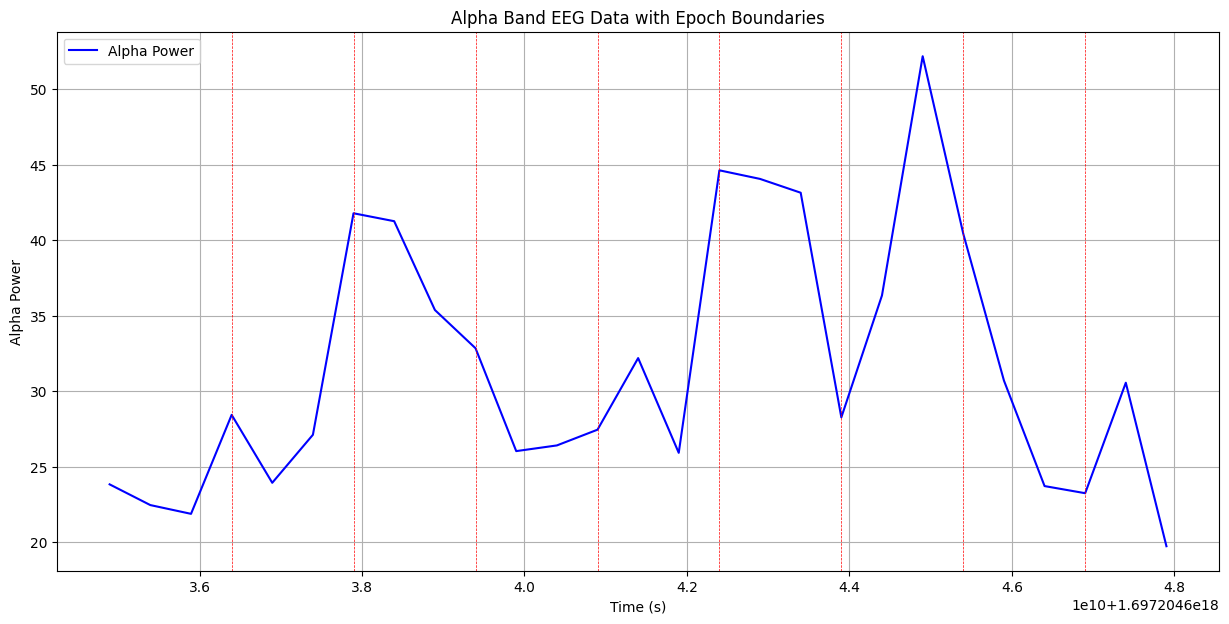

In [13]:
import h5py
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to convert a structured numpy array to a DataFrame
def extract_to_dataframe(dataset):
    df_index = pd.DataFrame(dataset['index'], columns=['index'])
    df_alpha = pd.DataFrame(dataset['values_block_0'])
    return pd.concat([df_index, df_alpha], axis=1)

# Specify the path to your HDF5 file
filename = "/Users/Sophia/hdf5/bands/20231013-134352.hdf5"

with h5py.File(filename, 'r') as f:
    # Extract the alpha band dataset
    alpha_band_dataset = f['eeg/bands/table'][:]
    
    # Convert it to a DataFrame
    alpha_band_df = extract_to_dataframe(alpha_band_dataset)

# Plot the alpha band data
plt.figure(figsize=(15, 7))
plt.plot(alpha_band_df['index'], alpha_band_df[0], label='Alpha Power', color='blue')

# Add vertical lines to represent epoch boundaries
epoch_length = 1.5  # Length of each epoch in seconds
step_size = 0.5     # Step size for sliding the window in seconds
num_epochs = len(alpha_band_df)  # Total number of epochs

for i in range(1, num_epochs):
    if i % (epoch_length / step_size) == 0:
        plt.axvline(x=alpha_band_df['index'][i], color='red', linestyle='--', linewidth=0.5)

plt.xlabel('Time (s)')
plt.ylabel('Alpha Power')
plt.title('Alpha Band EEG Data with Epoch Boundaries')
plt.legend()
plt.grid()
plt.show()
